In [30]:
% pwd

'/content'

In [27]:
import zipfile
 
try:
    with zipfile.ZipFile("/content/drive/My Drive/dataset/train.zip") as zf:
        zf.extractall()
        print("uncompress success")
 
except:
    print("uncompress fail")



uncompress success


In [0]:
import os, shutil
original_dataset_dir = './'
base_dir = './cat_and_dogs_small'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [0]:
# train, val, test split
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
# train cat, dog dir
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [0]:
# val cat, dog dir
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [0]:
# test cat, dog dir
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [0]:
# for 1000 cat image train_cats_dir copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# for 500 cat image val_cats_dir copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# for 500 cat image test_cats_dir copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# for 1000 dog image train_dogs_dir copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# for 500 dog image val_dogs_dir copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# for 500 dog image test_dogs_dir copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [52]:
# 제대로 했는지 확인
print('train cat, dog: ', len(os.listdir(train_cats_dir)), 
      len(os.listdir(train_dogs_dir)))

train cat, dog:  1000 1000


In [54]:
# 제대로 했는지 확인
print('val cat, dog: ', len(os.listdir(validation_cats_dir)), 
      len(os.listdir(validation_dogs_dir)))

val cat, dog:  500 500


In [55]:
# 제대로 했는지 확인
print('test cat, dog: ', len(os.listdir(test_cats_dir)), 
      len(os.listdir(test_dogs_dir)))

test cat, dog:  500 500


## Network making

In [59]:
from keras import layers
from keras import models

model = models.Sequential()
# 150*150*3을 입력으로 받고 필터는 3*3*3*32을 쓰겠다.
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [60]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [61]:
1e-4

0.0001

## Data preprocessing
- read images
- jpeg -> rgb decoding
- and, float tensor translate
- pixel scaling [0, 1]

In [68]:
from keras.preprocessing.image import ImageDataGenerator

# all image 1/255 scaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (150, 150), # image translate
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size = (150, 150), # image translate
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [69]:
# 1 generator = 20 * 150 * 150 * 3 infinite loof, and then break

for data_batch, labels_batch in train_generator:
  print('batch data size: ', data_batch.shape)
  print('batch label size: ', labels_batch.shape)
  break

batch data size:  (20, 150, 150, 3)
batch label size:  (20,)


In [73]:
# 제너레이터 이해하기
def generator():
  i = 0
  while True:
    i += 1
    yield i

for item in generator():
  print(item)
  if item > 4:
    break


1
2
3
4
5


In [74]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    # 배치 사이즈가 20이니까 20 * 50 하면 1000개로 모든 val set 사용할 수 있음
    validation_steps = 50)
model.save('act_and_dogs_small_1.h5')




Epoch 1/30





100/100 [==============================] - 18s 178ms/step - loss: 0.6909 - acc: 0.5250 - val_loss: 0.6785 - val_acc: 0.5990
Epoch 2/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6624 - acc: 0.6060 - val_loss: 0.6510 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 10s 98ms/step - loss: 0.6197 - acc: 0.6710 - val_loss: 0.6172 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 10s 97ms/step - loss: 0.5758 - acc: 0.6965 - val_loss: 0.6057 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 10s 98ms/step - loss: 0.5430 - acc: 0.7300 - val_loss: 0.5915 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 10s 98ms/step - loss: 0.5056 - acc: 0.7520 - val_loss: 0.6274 - val_acc: 0.6690
Epoch 7/30
100/100 [==============================] - 10s 97ms/step - loss: 0.4714 - acc: 0.7760 - val_loss: 0.5586 - val_acc: 0.7180
Epoch 8/30
100/100 [==============================] -

In [0]:
import matplotlib.pyplot as plt

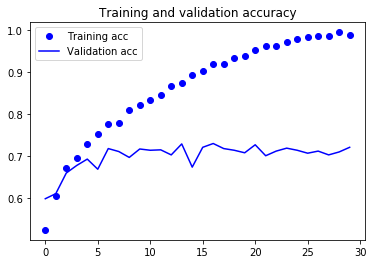

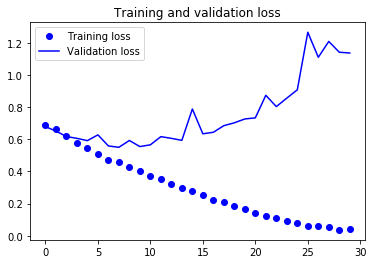

In [76]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

* `rotation_range`는 랜덤하게 사진을 회전시킬 각도 범위입니다(0-180 사이).
* `width_shift_range`와 `height_shift_range`는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
* `shear_range`는 랜덤하게 전단 변환을 적용할 각도 범위입니다.
* `zoom_range`는 랜덤하게 사진을 확대할 범위입니다.
* `horizontal_flip`은 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어, 풍경/인물 사진).
* `fill_mode`는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략입니다.

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [79]:
[os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)[:10]]

['./cat_and_dogs_small/train/cats/cat.50.jpg',
 './cat_and_dogs_small/train/cats/cat.162.jpg',
 './cat_and_dogs_small/train/cats/cat.894.jpg',
 './cat_and_dogs_small/train/cats/cat.172.jpg',
 './cat_and_dogs_small/train/cats/cat.733.jpg',
 './cat_and_dogs_small/train/cats/cat.274.jpg',
 './cat_and_dogs_small/train/cats/cat.150.jpg',
 './cat_and_dogs_small/train/cats/cat.552.jpg',
 './cat_and_dogs_small/train/cats/cat.192.jpg',
 './cat_and_dogs_small/train/cats/cat.551.jpg']

In [81]:
# 정렬이 이상하게 되는듯 첫 숫자만 봄 그냥 섞어주는 용인듯
sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)[:10]])

['./cat_and_dogs_small/train/cats/cat.150.jpg',
 './cat_and_dogs_small/train/cats/cat.162.jpg',
 './cat_and_dogs_small/train/cats/cat.172.jpg',
 './cat_and_dogs_small/train/cats/cat.192.jpg',
 './cat_and_dogs_small/train/cats/cat.274.jpg',
 './cat_and_dogs_small/train/cats/cat.50.jpg',
 './cat_and_dogs_small/train/cats/cat.551.jpg',
 './cat_and_dogs_small/train/cats/cat.552.jpg',
 './cat_and_dogs_small/train/cats/cat.733.jpg',
 './cat_and_dogs_small/train/cats/cat.894.jpg']

In [0]:
from keras.preprocessing import image
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
# 증식할 이미지 선택
img_path = fnames[3]

In [88]:
img_path

'./cat_and_dogs_small/train/cats/cat.100.jpg'

In [89]:
# 이미지를 읽고 크기를 변경
img = image.load_img(img_path, target_size = (150, 150))
# (150, 150, 3)으로 변경
x = image.img_to_array(img)
x.shape

(150, 150, 3)

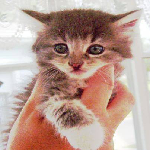

In [87]:
img

In [0]:
# 1, 150, 150, 3으로 변환
x = x.reshape((1,) + x.shape)

In [93]:
(1,)+image.img_to_array(img).shape

(1, 150, 150, 3)

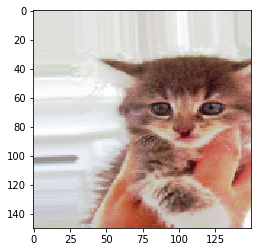

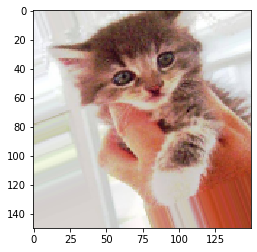

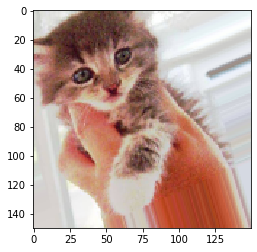

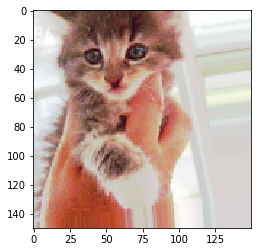

In [94]:
i = 0
# flow는 datagen 조건으로 랜덤하게 변환된 이미지 생성.
for batch in datagen.flow(x, batch_size = 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
  plt.show()

In [0]:
# 이거로는 부족함, 적은 수로 조합된 데이터라 기존 정보 재조합 기능만 함
# 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 DropOut 추가

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 0.001),
              metrics = ['acc'])

In [105]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    # 32개 * steps_per_epoch면 3200개의 모조 이미지를 만들어냄, 2000개가 넘어가면 다시 1번인데
    # 애초에 우리는 이미지 변형된 3200개를 쓰는거라, 인덱스가 겹쳐도 이미지는 겹치지 않을 거임
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 34s 337ms/step - loss: 0.7477 - acc: 0.5350 - val_loss: 0.6893 - val_acc: 0.5654
Epoch 2/100
100/100 [==============================] - 30s 301ms/step - loss: 0.6905 - acc: 0.5691 - val_loss: 0.6525 - val_acc: 0.5954
Epoch 3/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6737 - acc: 0.5959 - val_loss: 0.6474 - val_acc: 0.5920
Epoch 4/100
100/100 [==============================] - 30s 301ms/step - loss: 0.6771 - acc: 0.6166 - val_loss: 0.6261 - val_acc: 0.6211
Epoch 5/100
100/100 [==============================] - 29s 286ms/step - loss: 0.6321 - acc: 0.6356 - val_loss: 0.6118 - val_acc: 0.6650
Epoch 6/100
100/100 [==============================] - 32s 316ms/step - loss: 0.6491 - acc: 0.6341 - val_loss: 0.6202 - val_acc: 0.6617
Epoch 7/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6359 - acc: 0.6660 -

In [2]:
from google.colab import files
model.save('cats_and_dogs_small_2.h5')
files.download('cats_and_dogs_small_2.h5')

NameError: ignored

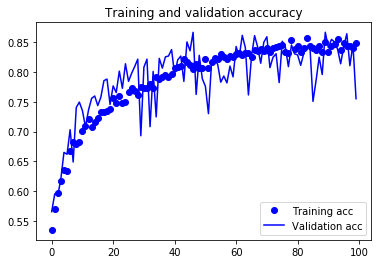

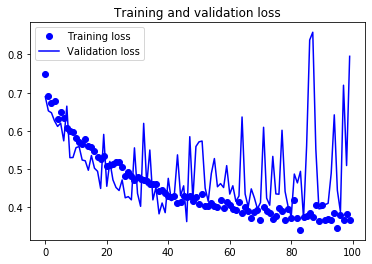

In [107]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()